# The aerodynamic center of a finite wing

For a finite wing we define an axis orthogonal to the wing's symmetry plane and passing through the point $P_{\mathrm{ac,W}}$ of coordinates $(X_{\mathrm{ac,W}},0,0)$. The pitching moment coefficient about this axis does not vary with the angle of attack and $P_{\mathrm{ac,W}}$ is colled the aerodynamic center of the wing.


We will use the Python language to work out our examples, so we set up some Python tools first.

In [23]:
# load libraries and set plot parameters
import math
import numpy as np
import tables as pt

from sympy import *

from IPython.display import display, Math, Latex, SVG

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

Let us know import the digitized data necessary to work out our numerical examples.

In [19]:
import h5py
import numpy as np

fileName = "./resources/wing_aerodynamic_center.h5"
f = h5py.File(fileName,'r',libver='latest')

# K1
dset_data_K1 = f["(x_bar_ac_w)_k1_vs_lambda/data"]
dset_var0_K1 = f["(x_bar_ac_w)_k1_vs_lambda/var_0"]

shape_data_K1 = dset_data_K1.shape
shape_var0_K1 = dset_var0_K1.shape

print('(x_bar_ac_w)_k1_vs_lambda/var_0')
print('shape of var0: {0}'.format(shape_var0_K1))
print('(x_bar_ac_w)_k1_vs_lambda/data')
print('shape of data: {0}'.format(shape_data_K1))
"""
print('lambda --> K1')
for i in range(shape_var0_K1[0]):
    print('{0}\t{1}'.format(dset_var0_K1[i],dset_data_K1[i]))
"""

# K2
dset_data_K2 = f["(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/data"]
dset_var0_K2 = f["(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_0"]
dset_var1_K2 = f["(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_1"]
dset_var2_K2 = f["(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_2"]

shape_data_K2 = dset_data_K2.shape
shape_var0_K2 = dset_var0_K2.shape
shape_var1_K2 = dset_var1_K2.shape
shape_var2_K2 = dset_var2_K2.shape

print('=====================================')

print('(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_0')
print('shape of var0: {0}'.format(shape_var0_K2))
print('(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_1')
print('shape of data: {0}'.format(shape_var1_K2))
print('(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_2')
print('shape of data: {0}'.format(shape_var2_K2))
print('(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/data')
print('shape of data: {0}'.format(shape_data_K2))




(x_bar_ac_w)_k1_vs_lambda/var_0
shape of var0: (11,)
(x_bar_ac_w)_k1_vs_lambda/data
shape of data: (11,)
(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_0
shape of var0: (6,)
(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_1
shape of data: (6,)
(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/var_2
shape of data: (10,)
(x_bar_ac_w)_k2_vs_L_LE_(AR)_(lambda)/data
shape of data: (10, 6, 6)


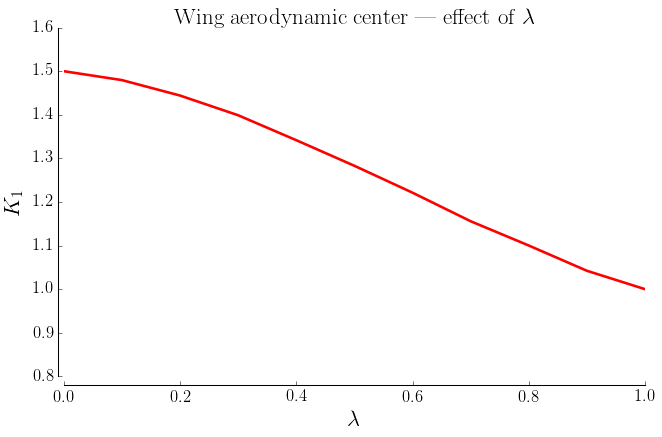

In [30]:
fig, ax = plt.subplots()
plt.plot(dset_var0_K1,dset_data_K1, color="red", linewidth=2.5, linestyle="-")
plt.title('Wing aerodynamic center --- effect of $\lambda$', fontsize=22)
plt.xlabel('$\lambda$', fontsize=22)
plt.ylabel('$K_1$', fontsize=22)
plt.axis([0, 1, 0.8, 1.6])
# Moving spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0.78))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',-0.01))

plt.show()

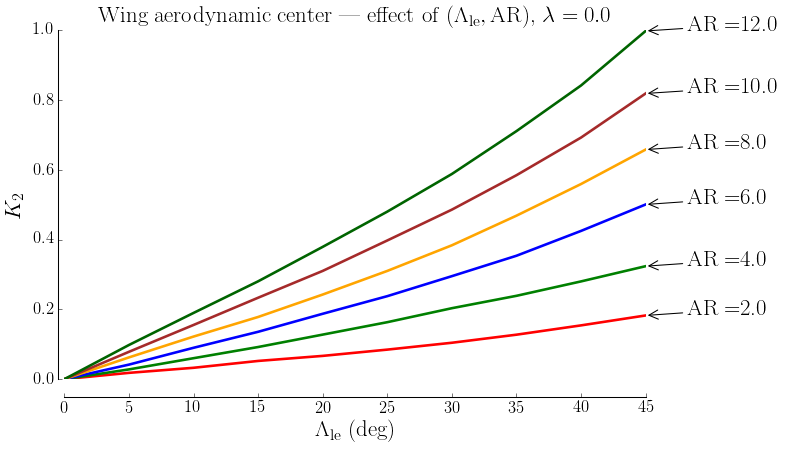

In [60]:
fig, ax = plt.subplots()

# TODO: make a function that extracts the slice of data and iterates on indices

slice00 = dset_data_K2[:,0,0]
plt.plot(dset_var2_K2,slice00, color="red", linewidth=2.5, linestyle="-")
plt.title('Wing aerodynamic center --- effect of $(\Lambda_{\mathrm{le}},\mathrm{AR})$', fontsize=22)
plt.annotate(r'$\mathrm{AR} =$'+r'{0}'.format(dset_var1_K2[0]),
             xy=(dset_var2_K2[9], slice00[9]), xycoords='data',
             xytext=(40, 0), textcoords='offset points', fontsize=22,
             arrowprops=dict(arrowstyle="->")) # , connectionstyle="arc3,rad=.5"

slice10 = dset_data_K2[:,1,0]
plt.plot(dset_var2_K2,slice10, color="green", linewidth=2.5, linestyle="-")
plt.annotate(r'$\mathrm{AR} =$'+r'{0}'.format(dset_var1_K2[1]),
             xy=(dset_var2_K2[9], slice10[9]), xycoords='data',
             xytext=(40, 0), textcoords='offset points', fontsize=22,
             arrowprops=dict(arrowstyle="->")) # , connectionstyle="arc3,rad=.5"

slice20 = dset_data_K2[:,2,0]
plt.plot(dset_var2_K2,slice20, color="blue", linewidth=2.5, linestyle="-")
plt.annotate(r'$\mathrm{AR} =$'+r'{0}'.format(dset_var1_K2[2]),
             xy=(dset_var2_K2[9], slice20[9]), xycoords='data',
             xytext=(40, 0), textcoords='offset points', fontsize=22,
             arrowprops=dict(arrowstyle="->")) # , connectionstyle="arc3,rad=.5"

slice30 = dset_data_K2[:,3,0]
plt.plot(dset_var2_K2,slice30, color="orange", linewidth=2.5, linestyle="-")
plt.annotate(r'$\mathrm{AR} =$'+r'{0}'.format(dset_var1_K2[3]),
             xy=(dset_var2_K2[9], slice30[9]), xycoords='data',
             xytext=(40, 0), textcoords='offset points', fontsize=22,
             arrowprops=dict(arrowstyle="->")) # , connectionstyle="arc3,rad=.5"

slice40 = dset_data_K2[:,4,0]
plt.plot(dset_var2_K2,slice40, color="brown", linewidth=2.5, linestyle="-")
plt.annotate(r'$\mathrm{AR} =$'+r'{0}'.format(dset_var1_K2[4]),
             xy=(dset_var2_K2[9], slice40[9]), xycoords='data',
             xytext=(40, 0), textcoords='offset points', fontsize=22,
             arrowprops=dict(arrowstyle="->")) # , connectionstyle="arc3,rad=.5"

slice50 = dset_data_K2[:,5,0]
plt.plot(dset_var2_K2,slice50, color="darkgreen", linewidth=2.5, linestyle="-")
plt.annotate(r'$\mathrm{AR} =$'+r'{0}'.format(dset_var1_K2[5]),
             xy=(dset_var2_K2[9], slice50[9]), xycoords='data',
             xytext=(40, 0), textcoords='offset points', fontsize=22,
             arrowprops=dict(arrowstyle="->")) # , connectionstyle="arc3,rad=.5"

plt.title(
    'Wing aerodynamic center --- effect of $(\Lambda_{\mathrm{le}},\mathrm{AR})$, '
    +r'$\lambda = {0}$'.format(dset_var0_K2[0]), 
    fontsize=22)

plt.axis([0, 45, 0, 1])

# Moving spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',-0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',-0.5))

plt.xlabel('$\Lambda_{\mathrm{le}}$ (deg)', fontsize=22)
plt.ylabel('$K_2$', fontsize=22)
plt.show()